   #  Final Project: Credit Risk Modelling

### Table of Contents
<b> I. Introduction  </b>

<b> II. Exploratory Data Analysis </b>

<b> III. Modelling </b>

<b> IV. Conclusion </b>

### <b> I. Introduction </b>
<b>1. Overview</b>
    
Credit scoring algorithms, which make a guess at the probability of default, are the method banks use to determine whether or not a loan should be granted. Thus, using this model, borrowers can use to help make the best financial decisions.


This dataset shows <i> data of credit card users and their defaulted behaviors in the past 2 years </i> , as well as their personal information (age, debt-to-limit ratio, number of dependents per person, number of loans,...). My goal in this project is to evaluate the <b> impact of these factors to the probability of default on credit cards.</b> My observation is <b> 150,000 with only 10,026 data is observed to be 'bad' behavior.</b>

#### <b> 2. Dataset information</b>
<b> <u> a. Data source </b> </u> : Kaggle (dataset: Give Me Some Credit contest https://www.kaggle.com/c/GiveMeSomeCredit/data)


<b> <u> b. Data Dictionary </b> </u> 

In [94]:
#Import library
import pandas as pd
import numpy as np
import seaborn as sns
import os
import datetime
import pathlib
import matplotlib.pyplot as plt
import numpy as np
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
from matplotlib import rcParams
from optbinning import OptimalBinning

In [2]:
dictionary = pd.read_excel("/Users/ntmy99/Desktop/Final Project/Data Dictionary.xls")
dictionary

,Variable Name,Description,Type
0,SeriousDlqin2yrs,Person experienced 90 days past due delinquenc...,Y/N
1,RevolvingUtilizationOfUnsecuredLines,Total balance on credit cards and personal lin...,percentage
2,age,Age of borrower in years,integer
3,NumberOfTime30-59DaysPastDueNotWorse,Number of times borrower has been 30-59 days p...,integer
4,DebtRatio,"Monthly debt payments, alimony,living costs di...",percentage
5,MonthlyIncome,Monthly income,real
6,NumberOfOpenCreditLinesAndLoans,Number of Open loans (installment like car loa...,integer
7,NumberOfTimes90DaysLate,Number of times borrower has been 90 days or m...,integer
8,NumberRealEstateLoansOrLines,Number of mortgage and real estate loans inclu...,integer
9,NumberOfTime60-89DaysPastDueNotWorse,Number of times borrower has been 60-89 days p...,integer


### II. Exploratory Data Analysis

<b> <i> a. Explore data </b> </i>

<b> <i> b. Missing value </b> </i>

<b> <i> c. Outliers </b> </i>

<b> <i> d. Undersampling </b> </i>

<b> <i> e. Feature Selection </b> </i>


In [113]:
#Importing data
train_df = pd.read_csv("/Users/ntmy99/Desktop/Final Project/cs-training.csv")
sample_df = pd.read_csv("/Users/ntmy99/Desktop/Final Project/sampleEntry.csv")
#Handling data
train_df = train_df.rename(columns={'Unnamed: 0': 'Customer_ID'})
train_df.dropna(how='all', inplace = True)
#Drop customer ID since it is just index :D:
traindf = train_df.drop(columns=['Customer_ID'])
traindff = traindf.copy()
traindf.head()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


First we should explore the data first: 

In [4]:
traindf.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 150000 entries, 0 to 149999
Data columns (total 11 columns):
 #   Column                                Non-Null Count   Dtype  
---  ------                                --------------   -----  
 0   SeriousDlqin2yrs                      150000 non-null  int64  
 1   RevolvingUtilizationOfUnsecuredLines  150000 non-null  float64
 2   age                                   150000 non-null  int64  
 3   NumberOfTime30-59DaysPastDueNotWorse  150000 non-null  int64  
 4   DebtRatio                             150000 non-null  float64
 5   MonthlyIncome                         120269 non-null  float64
 6   NumberOfOpenCreditLinesAndLoans       150000 non-null  int64  
 7   NumberOfTimes90DaysLate               150000 non-null  int64  
 8   NumberRealEstateLoansOrLines          150000 non-null  int64  
 9   NumberOfTime60-89DaysPastDueNotWorse  150000 non-null  int64  
 10  NumberOfDependents                    146076 non-null  float64
dtype

In [5]:
traindf.describe()

,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,150000.000000,150000.000000,150000.000000,150000.000000,150000.000000,1.202690e+05,150000.000000,150000.000000,150000.000000,150000.000000,146076.000000
mean,0.066840,6.048438,52.295207,0.421033,353.005076,6.670221e+03,8.452760,0.265973,1.018240,0.240387,0.757222
std,0.249746,249.755371,14.771866,4.192781,2037.818523,1.438467e+04,5.145951,4.169304,1.129771,4.155179,1.115086
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.029867,41.000000,0.000000,0.175074,3.400000e+03,5.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.154181,52.000000,0.000000,0.366508,5.400000e+03,8.000000,0.000000,1.000000,0.000000,0.000000
75%,0.000000,0.559046,63.000000,0.000000,0.868254,8.249000e+03,11.000000,0.000000,2.000000,0.000000,1.000000
max,1.000000,50708.000000,109.000000,98.000000,329664.000000,3.008750e+06,58.000000,98.000000,54.000000,98.000000,20.000000


<h6> There are few important things to note from here, as this dataset is quite informative and interesting: </h6>


- The number of defaulted customer is just <b> 6% the sample. </b>

- How could age possibly indicate that <b> <i> babies (?!) and 109-year-old customers borrowing loan? </b> </i>

- The monthly income seems to have <b> some really extreme outliers. </b> There are millionaires that earned millions a month, and there are people who have no income at all. 

- Revolving utilization (eg: the credit card utilization, or the debt to credit card limit ratio) <b> should be between 0 to 1 </b> but in this dataset, <b> <u> the mean is 6 </b> </u>. Strange enough.

- Can a person <b> <u> defaulted to 98 times in 2 years? </b> </u> 




<h3> a. Data exploration </h3>

In [95]:
num_f = ['RevolvingUtilizationOfUnsecuredLines', 'age','DebtRatio', 'MonthlyIncome','NumberOfOpenCreditLinesAndLoans','NumberRealEstateLoansOrLines','NumberOfDependents','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse']
cat_f = ['SeriousDlqin2yrs','NumberOfTimes90DaysLate']

/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/opt/anaconda3/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-lev

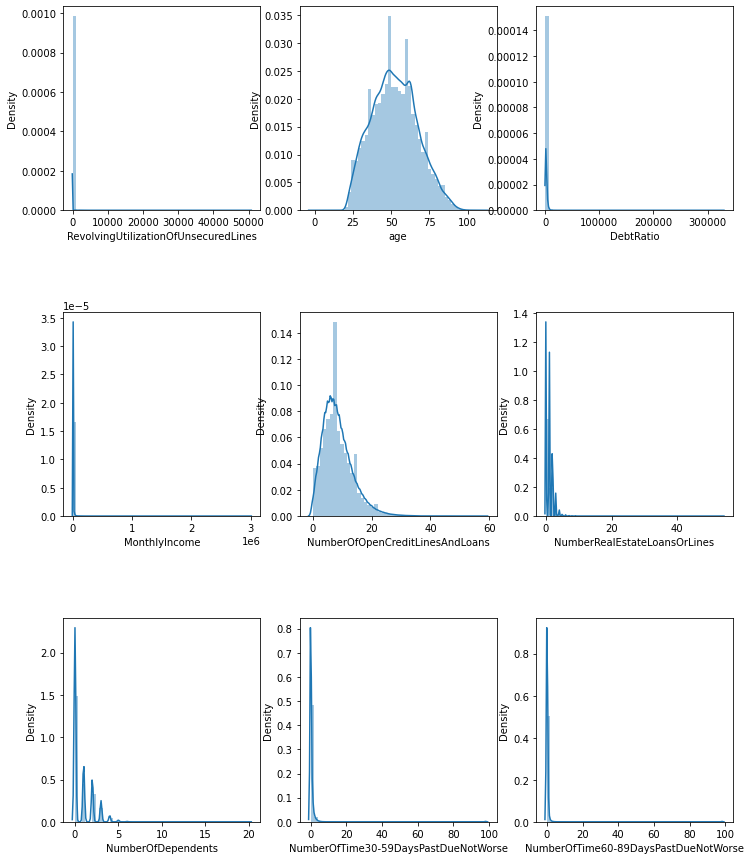

In [5]:
fig,axes = plt.subplots(3,3,figsize=(12,15))
for index,col in enumerate(num_f):
    x,y = index//3,index%3
    sns.distplot(traindf[col],ax=axes[x,y])

plt.subplots_adjust(hspace=0.5)

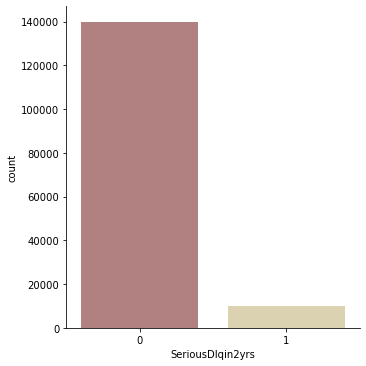

In [6]:
sns.catplot(x="SeriousDlqin2yrs", kind="count",label = "SeriousDlqin2yrs", palette="pink", data=traindf)
plt.subplots_adjust(hspace=0.5)

In [96]:
def plot_distributions_int64(feature):
    
    _, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.histplot(traindff[feature], kde=True, label='Train',stat='density',
                 discrete=True, color='pink', alpha=0.6, ax=axes[0])
    axes[0].legend()
    axes[0].set_title('Distribution')

    sns.boxplot(x='SeriousDlqin2yrs', y=feature, data=traindff, ax=axes[1], palette=['seagreen', 'tan'])
    
    X = traindff[[feature]].dropna()

    plt.suptitle('{} distributions'.format(feature), y=1.15);

In [97]:
def plot_distributions_float(feature):
    
    _, axes = plt.subplots(1, 2, figsize=(12,4))
    sns.kdeplot(traindff[feature].apply(np.log1p), label='Train',
                color='yellow', alpha=0.5, shade=True, edgecolor='k', ax=axes[0])

    axes[0].legend()
    axes[0].set_title('Distribution')
    axes[0].set_xlabel('{}'.format(feature))

    sns.boxplot(x='SeriousDlqin2yrs', y=traindff[feature],
                data=traindff, ax=axes[1], palette=['seagreen', 'tan'])

    X = traindff[[feature]].dropna()

    plt.suptitle('"{}" distributions'.format(feature), y=1.15);

<h5> (i) Age </h5>

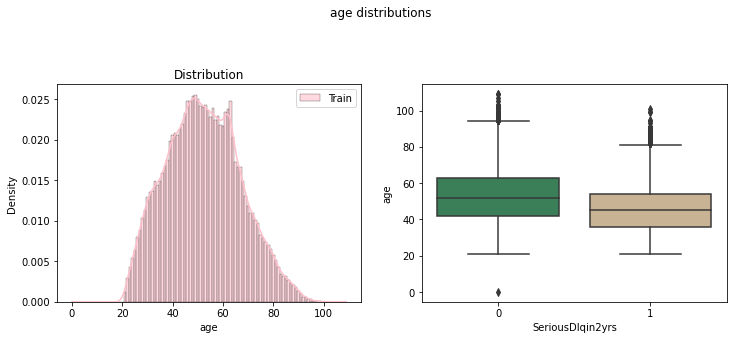

In [98]:
plot_distributions_int64('age')

In [99]:
#Bin group: 
condition_age = [(traindf['age'] >= 0) & (traindf['age'] <= 30),
    (traindf['age'] > 30) & (traindf['age'] <= 37),
    (traindf['age'] > 37) & (traindf['age'] <= 44),
    (traindf['age'] > 44) & (traindf['age'] <= 48),
    (traindf['age'] > 48) & (traindf['age'] <= 50),
    (traindf['age'] > 50) & (traindf['age'] <= 53),
    (traindf['age'] > 53) & (traindf['age'] <= 56),
    (traindf['age'] > 56) & (traindf['age'] <= 60),             
    (traindf['age'] > 60) & (traindf['age'] <= 63),
    (traindf['age'] > 63) & (traindf['age'] <= 68),
    (traindf['age'] > 68) & (traindf['age'] <= 75),
    (traindf['age'] > 75)]
value_age = ['21-30', '30-37', '37-44','44-48','48-50','50-53','53-56','56-60','60-63','63-68','68-75','>75']
traindf['age_group'] = np.select(condition_age, value_age)

#Count frequency of 0 and 1 in each group: 
age_1 = traindf[['age_group','SeriousDlqin2yrs']]
total_age_bin = age_1.groupby(by=['age_group'],as_index=False).agg('count')
age_default = age_1.groupby(by=['age_group'],as_index=False).agg('sum')
age_default_ratio = total_age_bin.merge(age_default, how='outer', on='age_group')
age_default_ratio.columns = ['age_group','Total','Default']
age_default_ratio['default_rate'] = age_default_ratio.eval('Default/Total*100')
age_default_ratio['non_default_rate'] = age_default_ratio.eval('((Total-Default)/Total)*100')
age_default_ratio

,age_group,Total,Default,default_rate,non_default_rate
0,21-30,10758,1244,11.563488,88.436512
1,30-37,15628,1611,10.308421,89.691579
2,37-44,21417,1880,8.778073,91.221927
3,44-48,14741,1200,8.140560,91.859440
4,48-50,7590,592,7.799736,92.200264
5,50-53,10884,814,7.478868,92.521132
6,53-56,10566,671,6.350558,93.649442
7,56-60,13356,664,4.971548,95.028452
8,60-63,10809,474,4.385235,95.614765
9,63-68,12884,391,3.034772,96.965228


<AxesSubplot:xlabel='age_group', ylabel='default_rate'>

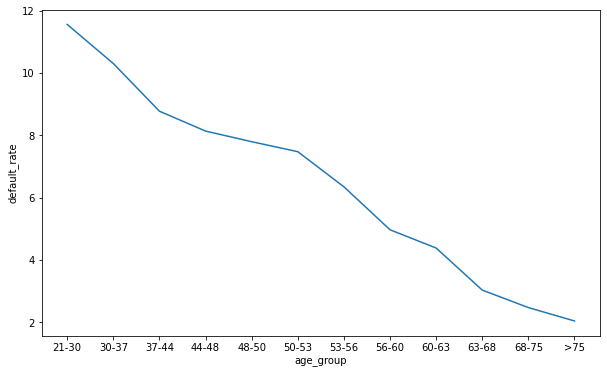

In [11]:
rcParams['figure.figsize'] = 10,6
sns.lineplot(data=age_default_ratio, x="age_group", y="default_rate")


It is obvious that age is an important factor deciding whether a customer in this dataset can default. The younger the customer is, the higher the probability of default in them. Thus, age has <u><b> a negative correlation </u></b> with the default rate. 

### (ii)  Revolving Utilization

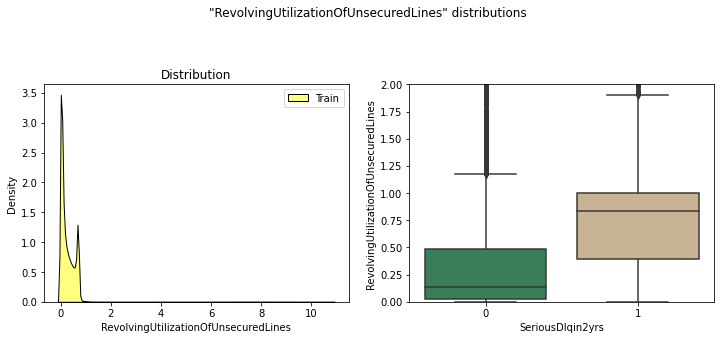

In [12]:
plot_distributions_float('RevolvingUtilizationOfUnsecuredLines')
plt.gca().set_ylim(0, 2);

In [13]:
traindf.RevolvingUtilizationOfUnsecuredLines.describe()

count    150000.000000
mean          6.048438
std         249.755371
min           0.000000
25%           0.029867
50%           0.154181
75%           0.559046
max       50708.000000
Name: RevolvingUtilizationOfUnsecuredLines, dtype: float64

In [14]:
x = traindf['RevolvingUtilizationOfUnsecuredLines'].values
y = traindf['SeriousDlqin2yrs']
optb3 = OptimalBinning(name='Revolving Utilization', dtype="numerical", solver="cp")
optb3.fit(x, y)
revolv = optb3.binning_table.build()
revolv_bin = revolv[['Bin','Count','Non-event','Event','Event rate']]
revolv_bin.loc[0:8]

,Bin,Count,Non-event,Event,Event rate
0,"[-inf, 0.06)",52081,51173,908,0.017434
1,"[0.06, 0.13)",18962,18560,402,0.021200
2,"[0.13, 0.22)",12911,12509,402,0.031136
3,"[0.22, 0.30)",9027,8676,351,0.038883
4,"[0.30, 0.39)",7769,7364,405,0.052130
5,"[0.39, 0.49)",7611,7122,489,0.064249
6,"[0.49, 0.70)",11599,10499,1100,0.094836
7,"[0.70, 0.90)",10172,8662,1510,0.148447
8,"[0.90, inf)",19868,15409,4459,0.224431


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

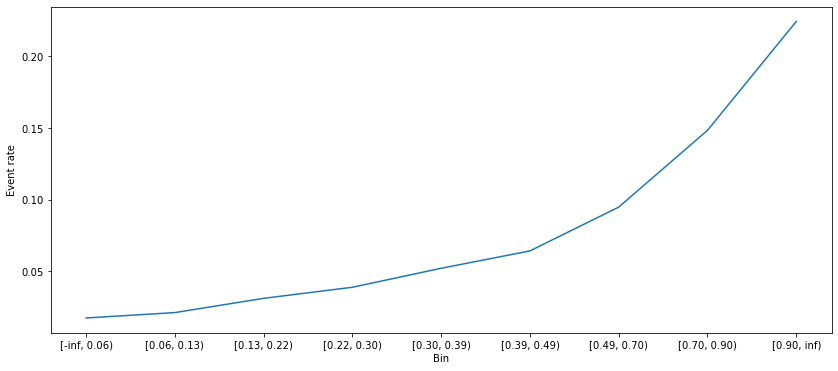

In [15]:
rcParams['figure.figsize'] = 14,6
sns.lineplot(data=revolv_bin.loc[0:8], x="Bin", y="Event rate")


For revolving utilization, <b> <u> the default rate is positively correlated </b> </u> with this indicator: it increases along the increase in this ratio. It can be as important as age in determining the outcome of this model 

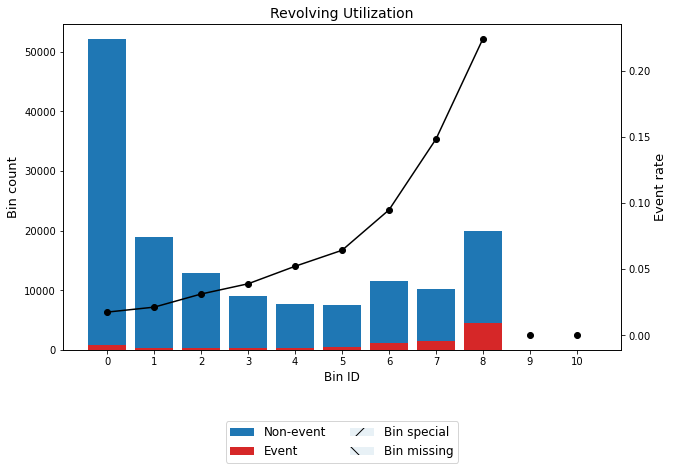

In [16]:
rcParams['figure.figsize'] = 10,6
optb3.binning_table.plot(metric="event_rate")

### (ii) Debt Ratio

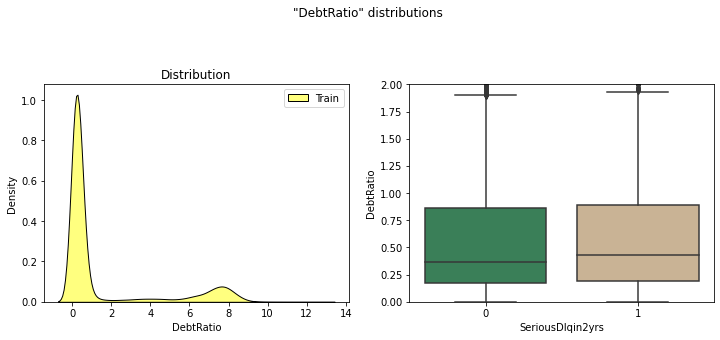

In [17]:
plot_distributions_float('DebtRatio')
plt.gca().set_ylim(0, 2);

In [18]:
traindf.DebtRatio.describe()

count    150000.000000
mean        353.005076
std        2037.818523
min           0.000000
25%           0.175074
50%           0.366508
75%           0.868254
max      329664.000000
Name: DebtRatio, dtype: float64

Does it make sense when someone own 330,000 times more than what they own?

In [19]:
traindf[traindf['DebtRatio'] > 3489][['SeriousDlqin2yrs','MonthlyIncome']].describe()

,SeriousDlqin2yrs,MonthlyIncome
count,3750.000000,185.000000
mean,0.064267,0.064865
std,0.245260,0.246956
min,0.000000,0.000000
25%,0.000000,0.000000
50%,0.000000,0.000000
75%,0.000000,0.000000
max,1.000000,1.000000


In [20]:
print('Missing Income for debt greater than 1: ', traindf[traindf['DebtRatio'] > 1]['MonthlyIncome'].isnull().mean())
print('Percentage of Missing Income that have a debt > 1 : ',(traindf[traindf['DebtRatio'] > 1]['MonthlyIncome'].isnull().sum()) / (traindf['MonthlyIncome'].isnull().sum()))

Missing Income for debt greater than 1:  0.7941486182656459
Percentage of Missing Income that have a debt > 1 :  0.9385489892704585


Obviously, for most of the debt ratio that is greater than 1, most of the time the monthly income is missing.

In [21]:
x = traindf['DebtRatio'].values
y = traindf['SeriousDlqin2yrs']
optb1 = OptimalBinning(name='DebtRatio', dtype="numerical", solver="cp")
optb1.fit(x, y)
debt = optb1.binning_table.build()
debt_bin = debt[['Bin','Count','Non-event','Event','Event rate']]
debt_bin

,Bin,Count,Non-event,Event,Event rate
0,"[-inf, 0.02)",13043,12384,659,0.050525
1,"[0.02, 0.35)",58248,54765,3483,0.059796
2,"[0.35, 0.42)",12807,11996,811,0.063325
3,"[0.42, 0.51)",10183,9444,739,0.072572
4,"[0.51, 0.65)",10998,10009,989,0.089925
5,"[0.65, 3.97)",14652,12965,1687,0.115138
6,"[3.97, 995.50)",13144,12316,828,0.062995
7,"[995.50, inf)",16925,16095,830,0.049040
8,Special,0,0,0,0.000000
9,Missing,0,0,0,0.000000


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

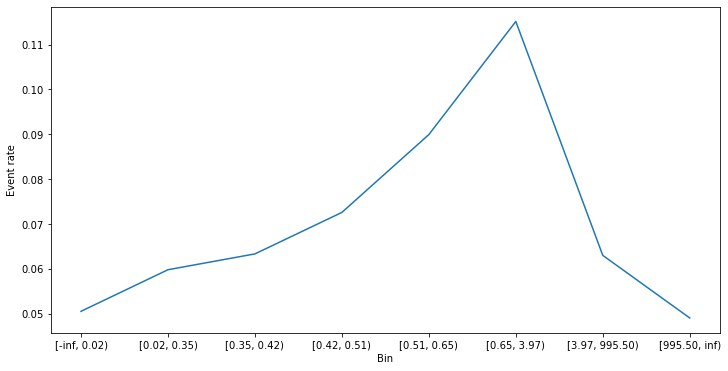

In [22]:
rcParams['figure.figsize'] = 12,6
sns.lineplot(data=debt_bin[0:8], x="Bin", y="Event rate")

Based on the above graph, it is easier to see that the relationship between debt ratio and our target variable <u> <b> seems not to be quite related </u> </b> to each other. However, for the debt ratio in between the range 0.02 to 3.97, the more people might default. As the debt ratio grows greater than 3.97 and even some unbelievable rate at 3000 or something, they just didn't default anymore even when the rate is high, which indicates to us that this might be an outliers. 

## Monthly Income

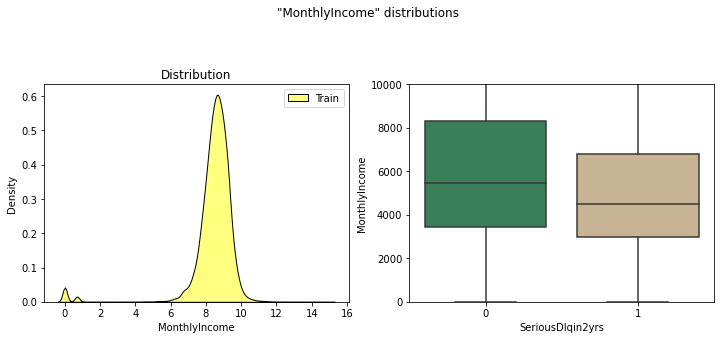

In [23]:
plot_distributions_float('MonthlyIncome')
plt.gca().set_ylim(0,10000);

In [24]:
traindf.MonthlyIncome.describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

In [25]:
x = traindf['MonthlyIncome'].values
y = traindf['SeriousDlqin2yrs']
optb4 = OptimalBinning(name='Monthly Income', dtype="numerical", solver="cp")
optb4.fit(x, y)
income = optb4.binning_table.build()
income_bin = income[['Bin','Count','Non-event','Event','Event rate']]
income_bin

,Bin,Count,Non-event,Event,Event rate
0,"[-inf, 1508.50)",7640,7080,560,0.073298
1,"[1508.50, 2569.50)",10929,9879,1050,0.096075
2,"[2569.50, 3459.50)",12232,11006,1226,0.100229
3,"[3459.50, 4831.50)",20911,19191,1720,0.082253
4,"[4831.50, 5320.50)",7611,7068,543,0.071344
5,"[5320.50, 6643.50)",16128,15050,1078,0.066840
6,"[6643.50, 7656.50)",9903,9353,550,0.055539
7,"[7656.50, 9945.50)",14975,14207,768,0.051285
8,"[9945.50, inf)",19940,19078,862,0.043230
9,Special,0,0,0,0.000000


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

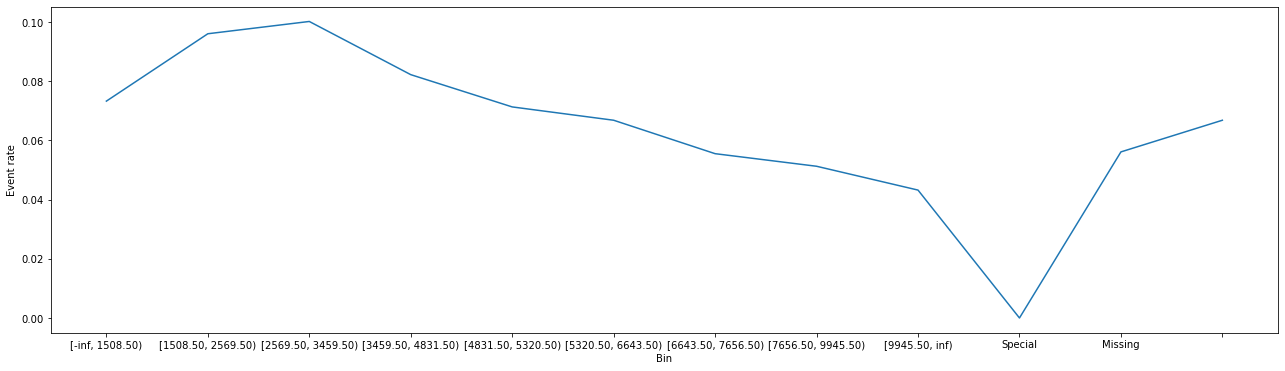

In [26]:
rcParams['figure.figsize'] = 22,6
sns.lineplot(data=income_bin, x="Bin", y="Event rate")

## (iv) Number of Loans 

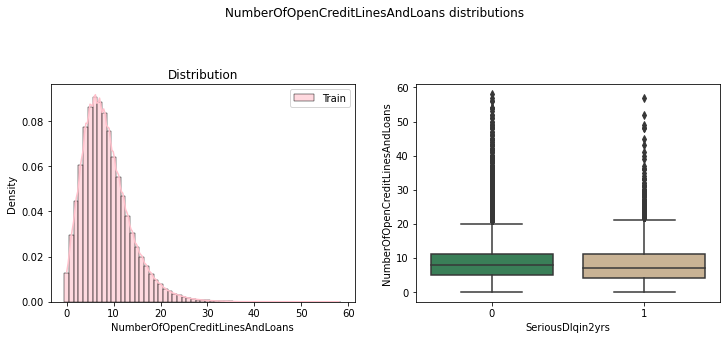

In [27]:
plot_distributions_int64('NumberOfOpenCreditLinesAndLoans')

In [28]:
traindf[['NumberOfOpenCreditLinesAndLoans']].describe()

,NumberOfOpenCreditLinesAndLoans
count,150000.000000
mean,8.452760
std,5.145951
min,0.000000
25%,5.000000
50%,8.000000
75%,11.000000
max,58.000000


In [29]:
x = traindf['NumberOfOpenCreditLinesAndLoans'].values
y = traindf['SeriousDlqin2yrs']
optb2 = OptimalBinning(name='DebtRatio', dtype="numerical", solver="cp")
optb2.fit(x, y)
noloans = optb2.binning_table.build()
noloans_bin = noloans[['Bin','Count','Non-event','Event','Event rate']]
noloans_bin

,Bin,Count,Non-event,Event,Event rate
0,"[-inf, 2.50)",12992,11314,1678,0.129156
1,"[2.50, 3.50)",9058,8376,682,0.075293
2,"[3.50, 4.50)",11609,10866,743,0.064002
3,"[4.50, 5.50)",12931,12112,819,0.063336
4,"[5.50, 7.50)",26859,25358,1501,0.055884
5,"[7.50, 8.50)",12562,11956,606,0.048241
6,"[8.50, 11.50)",29300,27591,1709,0.058328
7,"[11.50, 13.50)",12672,11921,751,0.059265
8,"[13.50, inf)",22017,20480,1537,0.069810
9,Special,0,0,0,0.000000


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

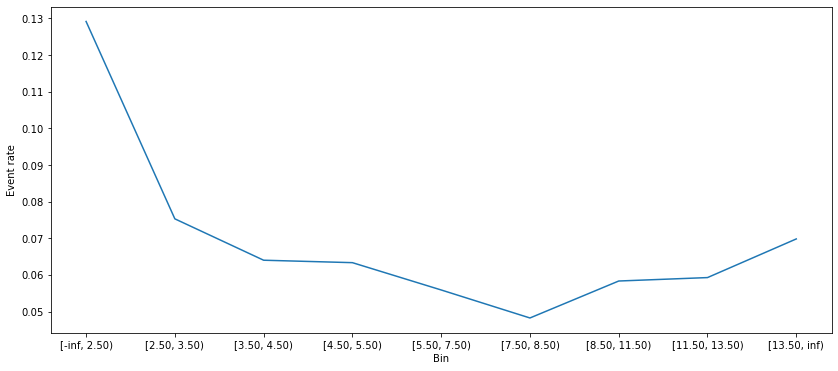

In [30]:
rcParams['figure.figsize'] = 14,6
sns.lineplot(data=noloans_bin.loc[0:8], x="Bin", y="Event rate")

Number of open loans also didn't tell us much insights about the target characteristics

## (iv) Number of Real Estate Loans 

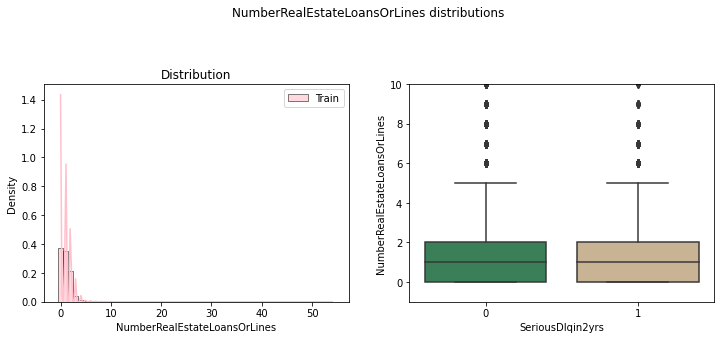

In [31]:
plot_distributions_int64('NumberRealEstateLoansOrLines')
plt.gca().set_ylim(-1,10);

## (v) Number of Dependants 

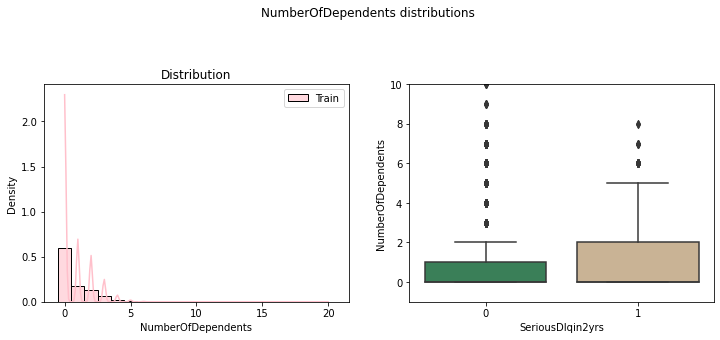

In [32]:
plot_distributions_int64('NumberOfDependents')
plt.gca().set_ylim(-1,10);

In [33]:
x = traindf['NumberOfDependents'].values
y = traindf['SeriousDlqin2yrs']
optb6 = OptimalBinning(name='DebtRatio', dtype="numerical", solver="cp")
optb6.fit(x, y)
depend = optb6.binning_table.build()
depend_bin = depend[['Bin','Count','Non-event','Event','Event rate']]
depend_bin

,Bin,Count,Non-event,Event,Event rate
0,"[-inf, 0.50)",86902,81807,5095,0.058629
1,"[0.50, 1.50)",26316,24381,1935,0.073529
2,"[1.50, 2.50)",19522,17938,1584,0.081139
3,"[2.50, inf)",13336,12103,1233,0.092457
4,Special,0,0,0,0.000000
5,Missing,3924,3745,179,0.045617
Totals,,150000,139974,10026,0.066840


<AxesSubplot:xlabel='Bin', ylabel='Event rate'>

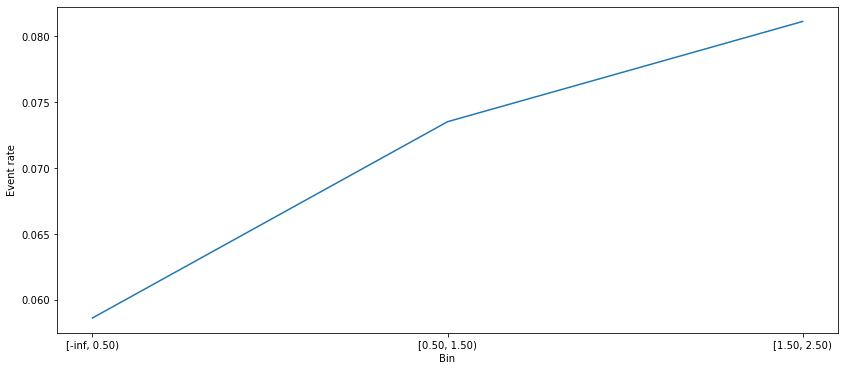

In [34]:
rcParams['figure.figsize'] = 14,6
sns.lineplot(data=depend_bin[0:3], x="Bin", y="Event rate")

## (vi) Number of delinquency days 

In [35]:
traindf.groupby('NumberOfTimes90DaysLate').NumberOfTimes90DaysLate.count()


NumberOfTimes90DaysLate
0     141662
1       5243
2       1555
3        667
4        291
5        131
6         80
7         38
8         21
9         19
10         8
11         5
12         2
13         4
14         2
15         2
17         1
96         5
98       264
Name: NumberOfTimes90DaysLate, dtype: int64

In the past 2 years, there are 264 people defaulted 98 times, and there is no person defaulted >17 times and <96 times. 

In [122]:
#check no loans
train_df[train_df['NumberOfTimes90DaysLate'] >= 96].describe()

,Customer_ID,SeriousDlqin2yrs,RevolvingUtilizationOfUnsecuredLines,age,NumberOfTime30-59DaysPastDueNotWorse,DebtRatio,MonthlyIncome,NumberOfOpenCreditLinesAndLoans,NumberOfTimes90DaysLate,NumberRealEstateLoansOrLines,NumberOfTime60-89DaysPastDueNotWorse,NumberOfDependents
count,269.000000,269.000000,2.690000e+02,269.000000,269.000000,269.000000,148.000000,269.000000,269.000000,269.0,269.000000,238.000000
mean,74052.862454,0.546468,9.999999e-01,34.245353,97.962825,5.739667,2557.135135,0.007435,97.962825,0.0,97.962825,0.369748
std,42954.890845,0.498764,3.003190e-15,13.061823,0.270628,26.019024,2745.777653,0.086065,0.270628,0.0,0.270628,0.830490
min,1734.000000,0.000000,9.999999e-01,21.000000,96.000000,0.000000,0.000000,0.000000,96.000000,0.0,96.000000,0.000000
25%,37025.000000,0.000000,9.999999e-01,24.000000,98.000000,0.000000,1333.000000,0.000000,98.000000,0.0,98.000000,0.000000
50%,72518.000000,1.000000,9.999999e-01,29.000000,98.000000,0.000000,2168.500000,0.000000,98.000000,0.0,98.000000,0.000000
75%,109885.000000,1.000000,9.999999e-01,43.000000,98.000000,0.000000,3174.500000,0.000000,98.000000,0.0,98.000000,0.000000
max,149770.000000,1.000000,9.999999e-01,79.000000,98.000000,255.000000,28733.000000,1.000000,98.000000,0.0,98.000000,5.000000


It makes sense when people keeps defaulted, but they are defaulted at a massive rate (more than 50%). So it could have more insight to us 

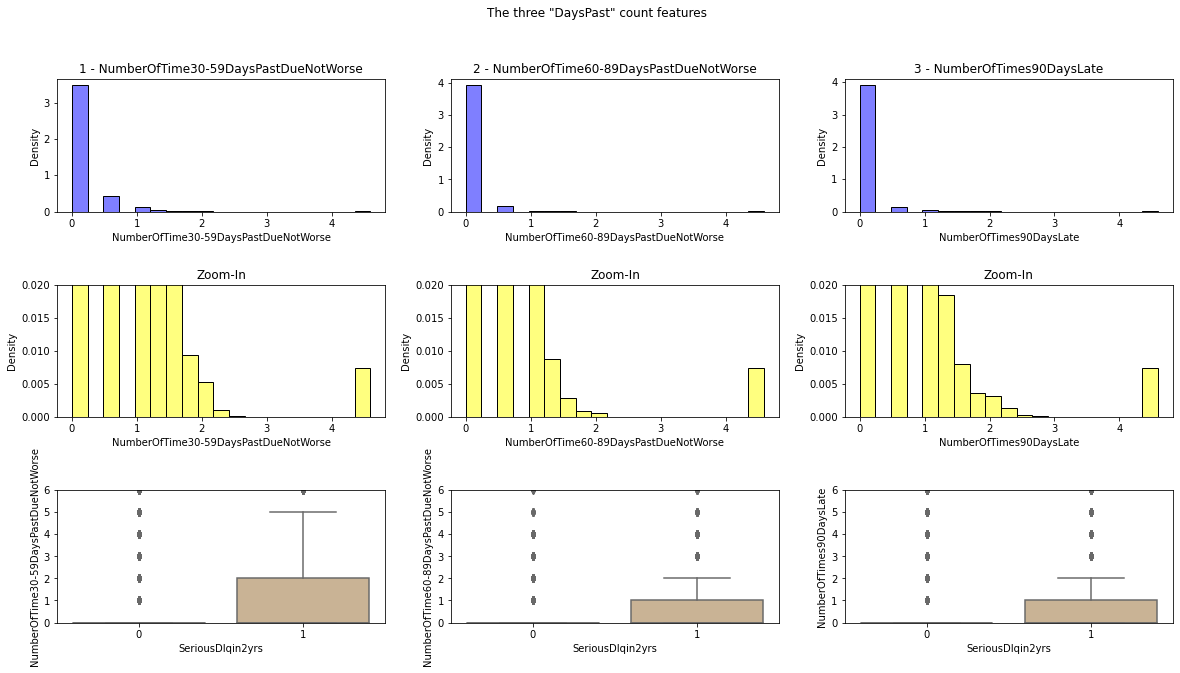

In [37]:
fig, axes = plt.subplots(3, 3, figsize=(20,10))
fig.subplots_adjust(hspace=0.55)
for i, feature in enumerate(['NumberOfTime30-59DaysPastDueNotWorse',
                             'NumberOfTime60-89DaysPastDueNotWorse',
                             'NumberOfTimes90DaysLate']):
    
    sns.histplot(traindf[feature].apply(np.log1p), label='Train',stat='density',
                 color='blue', alpha=0.5, edgecolor='k', ax=axes[0][i])
    sns.histplot(traindf[feature].apply(np.log1p), label='Train',stat='density',
                 color='yellow', alpha=0.5, edgecolor='k', ax=axes[1][i])
 
    sns.boxplot(x='SeriousDlqin2yrs', y=traindf[feature],
                data=traindf, ax=axes[2][i], palette=['tan'])
    axes[0][i].set_title('{} - {}'.format(i+1,feature))
    axes[1][i].set_title('Zoom-In')
    axes[1][i].set_ylim(0, 0.02)
    axes[2][i].set_ylim(0, 6)
plt.suptitle('The three "DaysPast" count features');

In [38]:
traindf[traindf['NumberOfTimes90DaysLate'] >= 96][['NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse']]

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse
1733,98,98,98
2286,98,98,98
3884,98,98,98
4417,98,98,98
4705,98,98,98
...,...,...,...
147774,98,98,98
149153,98,98,98
149239,98,98,98
149439,98,98,98


In [39]:
traindf[traindf['NumberOfTimes90DaysLate'] >= 96][['NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse','NumberOfTime60-89DaysPastDueNotWorse']].drop_duplicates()

,NumberOfTimes90DaysLate,NumberOfTime30-59DaysPastDueNotWorse,NumberOfTime60-89DaysPastDueNotWorse
1733,98,98,98
41944,96,96,96


In [40]:
#Bin group: 
condition_due = [(traindf['NumberOfTime30-59DaysPastDueNotWorse'] >= 0) & (traindf['NumberOfTime30-59DaysPastDueNotWorse'] <= 1),
    (traindf['NumberOfTime30-59DaysPastDueNotWorse'] > 1) & (traindf['NumberOfTime30-59DaysPastDueNotWorse'] <= 2),
    (traindf['NumberOfTime30-59DaysPastDueNotWorse'] > 2)]
value_due = ['0-1', '1-2', '>2']
traindf['30dayspastdue'] = np.select(condition_due, value_due)

#Count frequency of 0 and 1 in each group: 
due1= traindf[['30dayspastdue','SeriousDlqin2yrs']]
total_due_bin = due1.groupby(by=['30dayspastdue'],as_index=False).agg('count')
due_default = due1.groupby(by=['30dayspastdue'],as_index=False).agg('sum')
due_default_ratio = total_due_bin.merge(due_default, how='outer', on='30dayspastdue')
due_default_ratio.columns = ['30dayspastdue','Total','Default']
due_default_ratio['default_rate'] = due_default_ratio.eval('Default/Total*100')
due_default_ratio['non_default_rate'] = due_default_ratio.eval('((Total-Default)/Total)*100')
due_default_ratio

,30dayspastdue,Total,Default,default_rate,non_default_rate
0,0-1,142051,7450,5.244595,94.755405
1,1-2,4598,1219,26.511527,73.488473
2,>2,3351,1357,40.495375,59.504625


<AxesSubplot:xlabel='30dayspastdue', ylabel='default_rate'>

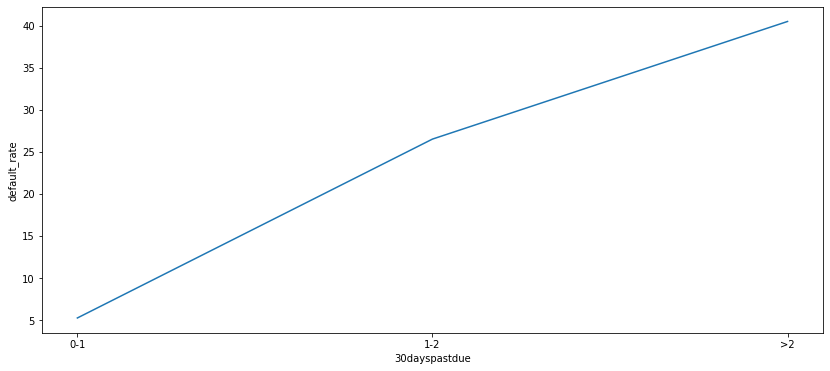

In [41]:
rcParams['figure.figsize'] = 14,6
sns.lineplot(data=due_default_ratio, x="30dayspastdue", y="default_rate")

# b. Missing value 

In [101]:
train_df.isnull().sum()

Customer_ID                                 0
SeriousDlqin2yrs                            0
RevolvingUtilizationOfUnsecuredLines        0
age                                         0
NumberOfTime30-59DaysPastDueNotWorse        0
DebtRatio                                   0
MonthlyIncome                           29731
NumberOfOpenCreditLinesAndLoans             0
NumberOfTimes90DaysLate                     0
NumberRealEstateLoansOrLines                0
NumberOfTime60-89DaysPastDueNotWorse        0
NumberOfDependents                       3924
dtype: int64

The missing value for Monthly Income seems to be <b> relatively high (~20% of dataset) </b>. First we will explore the missing value of Income to see whether should we impute mean or median into missing value, and to see if the person with missing Monthly Income have a high rate of default. 

The missing values for Number of Dependents is  <b> 3924 </b> , which account for <b> <u> nearly 2.5% of the dataset.  </b> </u>

In [43]:
#Should we impute mean, mode or median? 
traindf['MonthlyIncome'].describe()

count    1.202690e+05
mean     6.670221e+03
std      1.438467e+04
min      0.000000e+00
25%      3.400000e+03
50%      5.400000e+03
75%      8.249000e+03
max      3.008750e+06
Name: MonthlyIncome, dtype: float64

As we can see, there are super extreme outliers for this outliers when Monthly Income could ranging from 0 to millions. 

Thus the method of imputing mean would not be applicable here. 

<u> <b> The use of median (most frequent value) imputation migh be more appropriate </u> </b>

Now we will evaluate the missing value in  <b> <u> Number of Dependents. </b> </u> 

In [44]:
traindf['NumberOfDependents'].describe()

count    146076.000000
mean          0.757222
std           1.115086
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          20.000000
Name: NumberOfDependents, dtype: float64

It is obvious to see that <b> at least >=50 of the dataset, Number of Dependents is only 0. </b> High chance is that the No. of dependents of 1 accounts for 25% of the dataset. However, the maximum number of dependents is 20.

Will it be okay if we fill NaN value by mean? If not mean, how can mode or median be more appropriate?

The default rate is normal for this particular group.
Thus for these missing values, we should fill nan by median (most frequent value)

In [45]:
traindf.fillna(traindf.median(), inplace=True)
traindf.isnull().sum()

SeriousDlqin2yrs                        0
RevolvingUtilizationOfUnsecuredLines    0
age                                     0
NumberOfTime30-59DaysPastDueNotWorse    0
DebtRatio                               0
MonthlyIncome                           0
NumberOfOpenCreditLinesAndLoans         0
NumberOfTimes90DaysLate                 0
NumberRealEstateLoansOrLines            0
NumberOfTime60-89DaysPastDueNotWorse    0
NumberOfDependents                      0
age_group                               0
30dayspastdue                           0
dtype: int64

<h3> c. Outliers </h3>

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

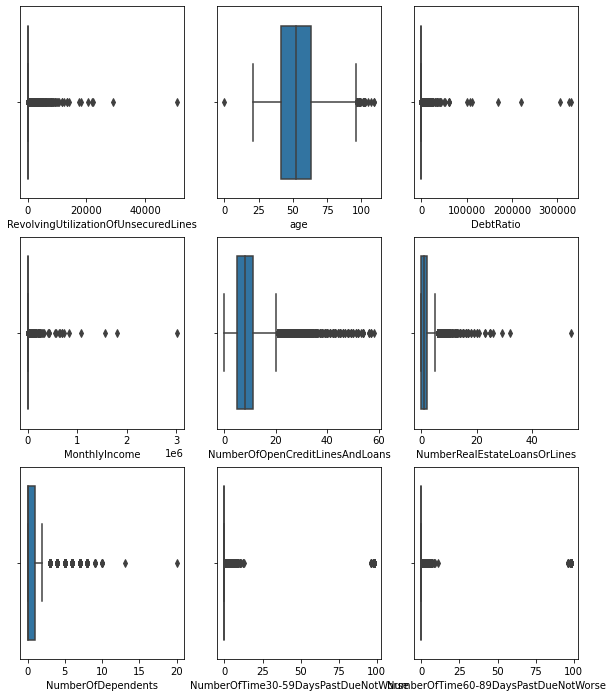

In [46]:
#Box plot visualization to find outlier: 
fig,axes = plt.subplots(3,3,figsize=(10,12))
for index,col in enumerate(num_f):
    x,y = index//3,index%3
    sns.boxplot(traindf[col],ax=axes[x,y])

In [47]:
def outlier(df, column):
    # first quantile/percentile
    first_qrt = np.quantile(df[column],0.25)
    # third quantile/percentile
    third_qrt = np.quantile(df[column],0.75)
    lower_whisker = first_qrt - (third_qrt -first_qrt )*1.5
    upper_whisker = third_qrt + (third_qrt -first_qrt )*1.5
    df_lower_outliers = df.loc[df[column] < lower_whisker]
    df_upper_outliers = df.loc[df[column] > upper_whisker] 
    print(column,':',len(df_lower_outliers),'-',len(df_upper_outliers))

In [48]:
for col in num_f:
    outlier(traindf,col)

RevolvingUtilizationOfUnsecuredLines : 0 - 763
age : 1 - 45
DebtRatio : 0 - 31311
MonthlyIncome : 0 - 9149
NumberOfOpenCreditLinesAndLoans : 0 - 3980
NumberRealEstateLoansOrLines : 0 - 793
NumberOfDependents : 0 - 13336
NumberOfTime30-59DaysPastDueNotWorse : 0 - 23982
NumberOfTime60-89DaysPastDueNotWorse : 0 - 7604


It seems that the outliers for our dataset are a lot, especially for the Monthly Income, Debt ratio, Revolving Utilization, Number of x days past due, number of loans.

In [102]:
#len upper/len df
import scipy
traindf['age'] = scipy.stats.mstats.winsorize(traindf['age'],limits = [0.0001,0.01])
traindf['NumberRealEstateLoansOrLines'] = scipy.stats.mstats.winsorize(traindf['NumberRealEstateLoansOrLines'],limits = [0,0.006])
traindf['RevolvingUtilizationOfUnsecuredLines'] = scipy.stats.mstats.winsorize(traindf['RevolvingUtilizationOfUnsecuredLines'],limits = [0,0.006])
traindf['NumberOfOpenCreditLinesAndLoans'] = scipy.stats.mstats.winsorize(traindf['NumberOfOpenCreditLinesAndLoans'],limits = [0,0.03])
traindf['NumberOfDependents'] = scipy.stats.mstats.winsorize(traindf['NumberOfDependents'],limits = [0,0.089])
traindf['MonthlyIncome'] = scipy.stats.mstats.winsorize(traindf['MonthlyIncome'],limits = [0,0.22])
traindf['DebtRatio'] = scipy.stats.mstats.winsorize(traindf['DebtRatio'],limits = [0,0.21])
traindf['NumberOfTime30-59DaysPastDueNotWorse'] = scipy.stats.mstats.winsorize(traindf['NumberOfTime30-59DaysPastDueNotWorse'],limits = [0,0.20])
traindf['NumberOfTime60-89DaysPastDueNotWorse'] = scipy.stats.mstats.winsorize(traindf['NumberOfTime60-89DaysPastDueNotWorse'],limits = [0,0.05])

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
/opt/anaconda3/lib/python3.8/si

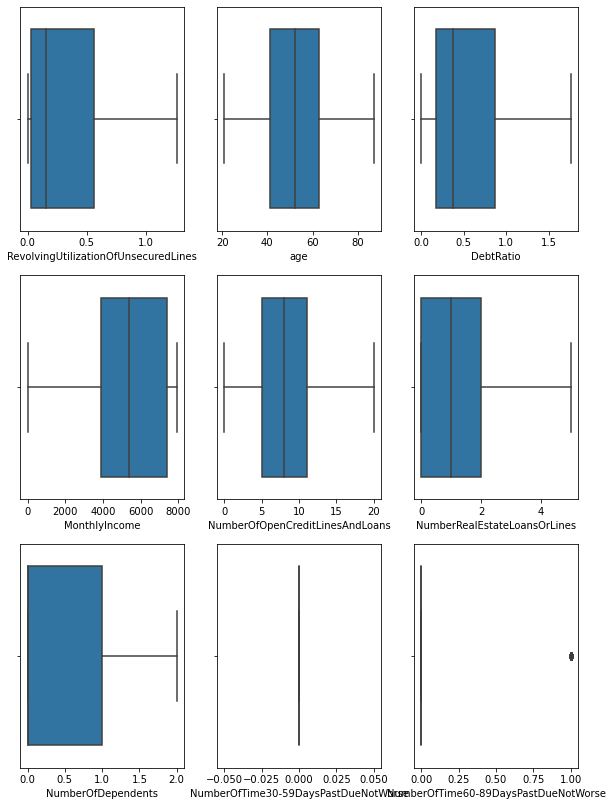

In [103]:
#Box plot visualization after handling outliers:  
fig,axes = plt.subplots(3,3,figsize=(10,14))
for index,col in enumerate(num_f):
    x,y = index//3,index%3
    sns.boxplot(traindf[col],ax=axes[x,y])

<h4> d. Feature Selection </h4>

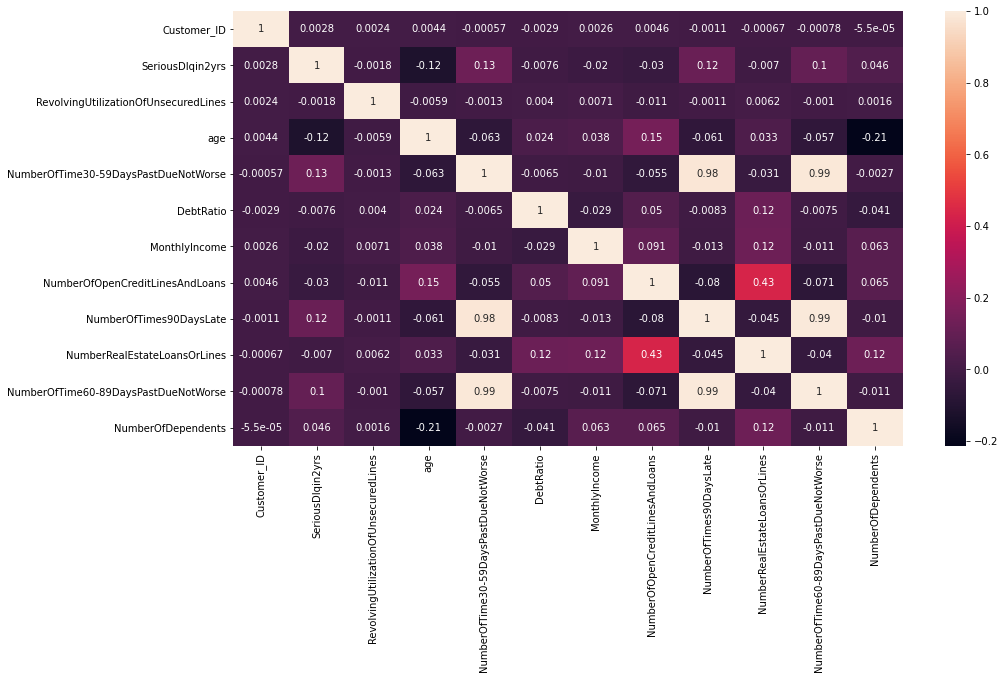

In [51]:
corrMatrix = train_df.corr()
plt.figure(figsize=(15, 8))
sns.heatmap(corrMatrix, annot = True)
plt.show()

Based on the data exploratory, we can conclude that this data below is important and relevant to the outcome of this model without making it overfitting or underfitting: 
- Revolving Utilization
- Age
- Debt Ratio 
- Monthly Income 
- Number of 30-59 days delinquency


As we can see from the correlation matrix, the relevant between 3 number of xx days delinquency is highly correlated with an correlation coefficient of >0.9 (~0.99) thus we should drop two columns and keep only 30-59 days delinquency

In [52]:
clean_train = traindf[['SeriousDlqin2yrs','NumberRealEstateLoansOrLines','RevolvingUtilizationOfUnsecuredLines','age','NumberOfTimes90DaysLate','NumberOfTime30-59DaysPastDueNotWorse','DebtRatio','MonthlyIncome']].copy()

<h4> e. Oversampling </h4>

In [53]:
good = clean_train.SeriousDlqin2yrs.value_counts()[0]
bad = clean_train.SeriousDlqin2yrs.value_counts()[1]
numberbad = bad/(good+bad) * 100 
print('The number of good behavior is:',good)
print('The number of good behavior is:',bad)
print ('The percentage of bad customer on this dataset is:',numberbad,'%') 

The number of good behavior is: 139974
The number of good behavior is: 10026
The percentage of bad customer on this dataset is: 6.683999999999999 %


The imbalanced dataset might affect the outcome of our model as it can be <b> <u> biased </b> </u> toward the majority - the good behavior. It might have a good accuracy rate, as it predicts the good behavior exactly, but when it comes to our target of classifying bad credit rate, it will not perform at its best since they keep predict that everyone is good. 

To handle this problem, we should use Resampling technique. Since our dataset is large  nearly ~150,000 dataset, so we should use <b> <u> over-sampling technique (SMOTE). </b> </u> This method will select the minority of this dataset and then duplicate it


In [104]:
from sklearn.model_selection import train_test_split
X = clean_train.drop("SeriousDlqin2yrs", axis=1).copy()
y = clean_train.SeriousDlqin2yrs
X.shape, y.shape
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [56]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X = np.array(X)
X, y = oversample.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)
print("Number  X_train dataset: ", X_train.shape)
print("Number  y_train dataset: ", y_train.shape)
print("Number  X_test dataset: ", X_test.shape)
print("Number  y_test dataset: ", y_test.shape)

Number  X_train dataset:  (195963, 7)
Number  y_train dataset:  (195963,)
Number  X_test dataset:  (83985, 7)
Number  y_test dataset:  (83985,)


In [57]:
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train.ravel())

In [58]:
#pip install --upgrade scikit-learn
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

print('After OverSampling, the shape of train_X: {}'.format(X_train_res.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_res.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_res==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_res==0)))

Before OverSampling, counts of label '1': 98126
Before OverSampling, counts of label '0': 97837 

After OverSampling, the shape of train_X: (196252, 7)
After OverSampling, the shape of train_y: (196252,) 

After OverSampling, counts of label '1': 98126
After OverSampling, counts of label '0': 98126


## III.Modelling 

<b> <u> 1. Logistic Regression </b> </u> 

<b> <u> 2. Random Forest </b> </u> 

<b> <u> 3. Gradient Boosting </b> </u> 

## 1.  Logistic Regression

Logistic regression with class_weight = balanced to reduce the imbalance dataset effect

In [59]:
#ORIGNIAL DATASET:
X1 = clean_train.drop("SeriousDlqin2yrs", axis=1).copy()
y1 = clean_train.SeriousDlqin2yrs
X1.shape, y1.shape
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.3, random_state=0)

In [60]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x1_train = sc.fit_transform(X1_train)
x1_test = sc.transform(X1_test)

In [84]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
model_1 = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1000, max_iter=1000)
model_1.fit(x1_train, y1_train)
print("Accuracy Score {}".format(accuracy_score(y1_test, model_1.predict(x1_test))))
print("AUC Score {}".format(roc_auc_score(y1_train,y_scores1)))

Accuracy Score 0.7563777777777778
AUC Score 0.578468005324007


<AxesSubplot:>

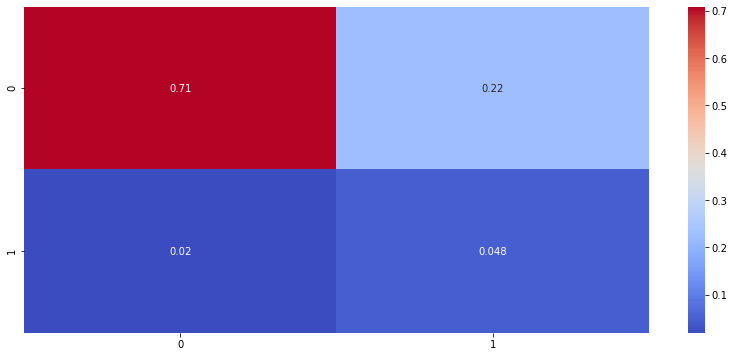

In [91]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
y_scores_proba1 = model_1.predict_proba(X1_train)
y_scores1 = y_scores_proba1[:,1]
cm = confusion_matrix(y1_test, model_1.predict(x1_test))
sns.heatmap(cm/np.sum(cm),annot = True, cmap = 'coolwarm' ) 


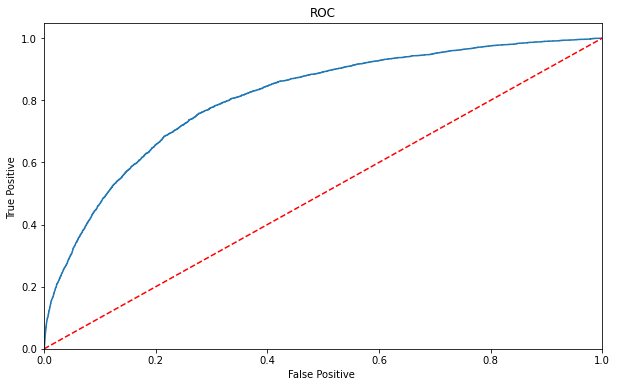

In [172]:
logit_roc_auc = roc_auc_score(y1_test, model_1.predict(x1_test))
fpr, tpr, thresholds = roc_curve(y1_test, model_1.predict_proba(x1_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC')
plt.show()

In [108]:
#Using oversampling: 

In [213]:
x_train = sc.fit_transform(X_train_res)
x_test = sc.transform(X_test)
model = LogisticRegression(random_state=42, solver="saga", penalty="l1", class_weight="balanced", C=1000, max_iter=1000)
model.fit(x_train, y_train_res)
print("Accuracy Score {}".format(accuracy_score(y_test, model.predict(x_test))))


Accuracy Score 0.7513841757456688


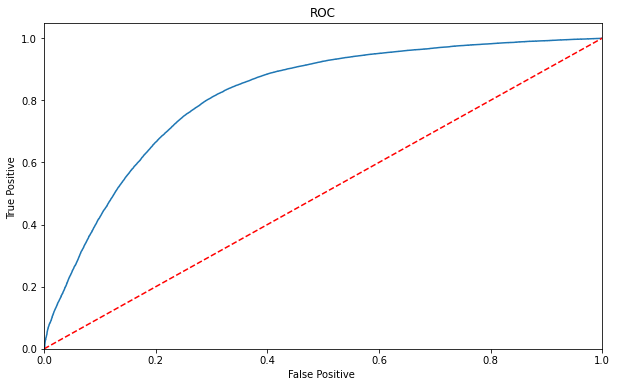

In [208]:
logit_roc_auc = roc_auc_score(y_test, model.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, model_1.predict_proba(x_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='AUC (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive ')
plt.ylabel('True Positive ')
plt.title('ROC')
plt.show()

## 2. Random Forest 

In [209]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier(random_state=42,n_estimators=300, max_depth=5, class_weight="balanced")
forest.fit(X1_train,y1_train) 
y_scores_proba = forest.predict_proba(X1_train)
y_scores = y_scores_proba[:,1]
fpr, tpr, thresh = roc_curve(y1_train, y_scores)

In [212]:
print("AUC Score {}".format(roc_auc_score(y1_train,y_scores)))

AUC Score 0.8352898287583517


Text(0, 0.5, 'True Positive rate')

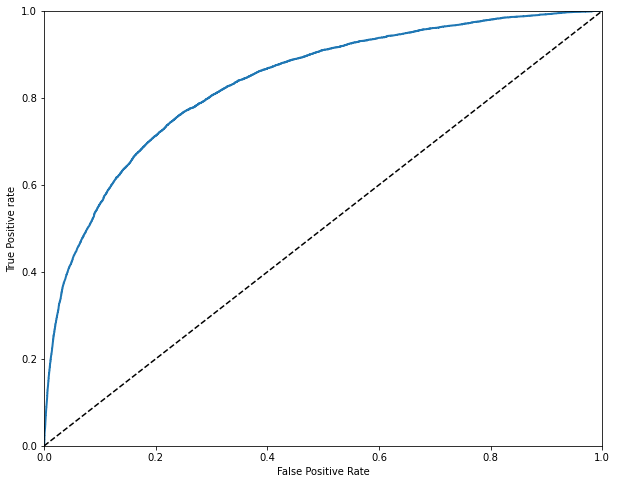

In [184]:
plt.figure(figsize=(10,8))
plt.plot(fpr, tpr, linewidth=2)
plt.plot([0,1],[0,1], "k--")
plt.axis([0,1,0,1])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive rate")

## 3. Gradient  Boosting 

In [107]:
from sklearn.ensemble import GradientBoostingClassifier

In [129]:
gbc_model = GradientBoostingClassifier(n_estimators=200, learning_rate=0.05 ,max_depth=4,  random_state=42)
gbc_model.fit(X1_train,y1_train)
gbc_clf_proba = gbc_model.predict_proba(X1_train)
gbc_clf_scores = gbc_clf_proba[:,1]
gbc_val_proba = gbc_clf.predict_proba(X1_test)
gbc_val_scores = gbc_val_proba[:,1]
print("AUC Score {}".format(roc_auc_score(y1_test, gbc_val_scores)))

AUC Score 0.8356740721606282


In [128]:
accuracy_score(y1_test,gbc_model.predict(x1_test))

0.9325333333333333

In [188]:
import pickle
#Save model
path = './'
filename = 'credit_risk_model.p'
pickle.dump(gbc_model, open(path + filename, 'wb'))